In [50]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy import linalg
%matplotlib inline

def show_gradient_descent(A, b):
#  enter your code here, and remove the following line (30%)
   # init value
   x = np.array([[-2, 2]]).T
   alpha = 0.02
   max_iter = 1000
   # calculate ||Ax-b||**2
   f = A.dot(x) - b # `A.dot(x) - b` shape is [2,1]
   f =  np.linalg.norm(f)**2
   for k in range(max_iter):
      print("{:d}, ({:.4f}, {:.4f}), {:.8f}".format(k, x[0, 0], x[1, 0], f))
      x_prev = x
      d_fx = 2 * (A.T.dot(A).dot(x) - A.T.dot(b))
      x = x - alpha * d_fx

      if np.linalg.norm(x - x_prev) <= 10**-8: # then stop
         return 
      # calculate ||Ax-b||**2
      f = A.dot(x) - b # `A.dot(x) - b` shape is [2,1]
      f = np.linalg.norm(f)**2

In [51]:
def draw_gradient_descent(A, b):
    xx, yy = np.meshgrid(np.arange(-2,2.1,0.1), np.arange(-2,2.1,0.1))
    F1 = A[0][0]*xx + A[0][1]*yy - b[0];
    F2 = A[1][0]*xx + A[1][1]*yy - b[1];
    zz = F1*F1 + F2*F2;
    # gca() is no longer supporting projection argument
    # plt3d = plt.figure().gca(projection='3d')
    fig = plt.figure()
    plt3d = fig.add_subplot(111, projection='3d')

    plt3d.plot_surface(xx, yy, zz, alpha=0.7, cmap=cm.coolwarm)
    
#  enter your code here (14%)
    
    # do gradient descent
    x_list = []
    y_list = []
    f_list = []
    x = np.array([[-2, 2]]).T
    alpha = 0.02
    max_iter = 1000
    # calculate ||Ax-b||**2
    f = A.dot(x) - b # `A.dot(x) - b` shape is [2,1]
    f =  np.linalg.norm(f)**2
    for k in range(max_iter):
        # store the detail in period of gradient decent
        # print("{:d}, ({:.4f}, {:.4f}), {:.8f}".format(k, x[0, 0], x[1, 0], f))
        x_list.append(x[0, 0])
        y_list.append(x[1, 0])
        f_list.append(f)
        x_prev = x
        d_fx = 2 * (A.T.dot(A).dot(x) - A.T.dot(b))
        x = x - alpha * d_fx

        if np.linalg.norm(x - x_prev) <= 10**-8: # then stop
            break 
        # calculate ||Ax-b||**2
        f = A.dot(x) - b # `A.dot(x) - b` shape is [2,1]
        f = np.linalg.norm(f)**2

    # plot process of gradient descent
    ax = plt.gca()
    ax.scatter(x_list, y_list, f_list, color='red', marker='o', s=20)
    
    # Get Normal equation: A^TAx = A^Tb
    # Rank(A^TA) == Rank(A^T) == 1, so A^TA is singular matrix. Hence, x has many solutions.
    # Solve the Normal equation to get all possible x.
    AT_A = A.T.dot(A)
    AT_b = A.T.dot(b)
    line_x = np.linspace(-2.1, 2.1, 20)
    line_y = np.array([(AT_b[0, 0] - AT_A[0, 0] * i) / AT_A[0, 1] for i in line_x])
    line_f = np.array([np.linalg.norm(A @ np.array([[x], [y]]) - b) ** 2 for x, y in zip(line_x, line_y)])
    # print(line_f)
    # draw optimation solutions line(blue)
    ax.plot(line_x, line_y, line_f, color='blue', linewidth=2)

    
    plt.show()

0, (-2.0000, 2.0000), 113.00000000
1, (-1.4000, 0.8000), 41.00000000
2, (-1.0400, 0.0800), 15.08000000
3, (-0.8240, -0.3520), 5.74880000
4, (-0.6944, -0.6112), 2.38956800
5, (-0.6166, -0.7667), 1.18024448
6, (-0.5700, -0.8600), 0.74488801
7, (-0.5420, -0.9160), 0.58815968
8, (-0.5252, -0.9496), 0.53173749
9, (-0.5151, -0.9698), 0.51142550
10, (-0.5091, -0.9819), 0.50411318
11, (-0.5054, -0.9891), 0.50148074
12, (-0.5033, -0.9935), 0.50053307
13, (-0.5020, -0.9961), 0.50019190
14, (-0.5012, -0.9976), 0.50006909
15, (-0.5007, -0.9986), 0.50002487
16, (-0.5004, -0.9992), 0.50000895
17, (-0.5003, -0.9995), 0.50000322
18, (-0.5002, -0.9997), 0.50000116
19, (-0.5001, -0.9998), 0.50000042
20, (-0.5001, -0.9999), 0.50000015
21, (-0.5000, -0.9999), 0.50000005
22, (-0.5000, -1.0000), 0.50000002
23, (-0.5000, -1.0000), 0.50000001
24, (-0.5000, -1.0000), 0.50000000
25, (-0.5000, -1.0000), 0.50000000
26, (-0.5000, -1.0000), 0.50000000
27, (-0.5000, -1.0000), 0.50000000
28, (-0.5000, -1.0000), 0.500

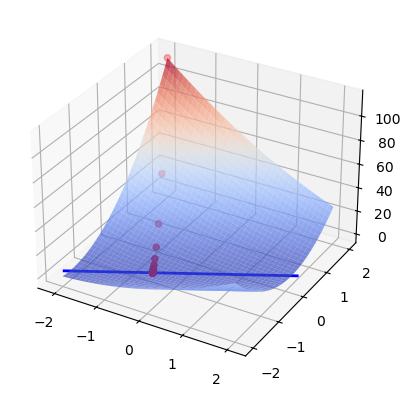

In [52]:
if __name__ == '__main__':
  b = np.array([[1], [2]])
  A = np.array([[1, -2], [1, -2]])
  show_gradient_descent(A, b)
  draw_gradient_descent(A, b)

In [53]:
# Try different learning rates of alpha. How to adjust the learning rate for faster speed of convergence? (4%)
# 如何調整 alpha 使得所需迴圈次數愈少愈好(即較快達到收斂)？
# Write down your answer here. 
# ANS:
# Increase the value of alpha, and it will need less loops.
# However, it can't be too large in order to avoiding divergence.

In [54]:
# Try different initial points of x. Do different initial points give rise to different to optimal solutions? (4%)
# 不同初始點 x 會使演算法找到不同最佳解嗎?
# Write down your answer here.
# ANS: 
# Yes. x will go down the surface in different path. x will end at different place on the optimal-solutions line because there are infinitely many optimal solutions for this exercise.

In [55]:
# Does the minimum vary with the values of the initial point? (4%)
# 不同初始點 x 會使演算法找到不同最小值嗎?
# Write down your answer here. 
# ANS: 
# No. x always reaches the lowest place(global minimum) on f(x), so different initial points will get the same minimum.

In [56]:
# Is the minimum a local minimum or a global minimum? (4%)
# # Write down your answer here. 
# ANS: 
# It is the global minimum because f(x) is convex function. Hence, minimum is one and only.